In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [5]:
from datetime import datetime

df = pd.read_csv(r"C:\Users\arjd2\OneDrive\Documents\GitHub\JPMC_Quant_Research\task1\code\task2.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop(columns='price_pred', inplace=True)

def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, withdrawal_rate, max_volume, storage_costs):
    """
    Calculate the value of a gas storage contract.

    Args:
        injection_dates (list of datetime): List of injection dates.
        withdrawal_dates (list of datetime): List of withdrawal dates.
        purchase_prices (list of float): List of purchase prices on injection dates.
        sale_prices (list of float): List of sale prices on withdrawal dates.
        injection_rate (float): Rate at which gas can be injected (monthly).
        withdrawal_rate (float): Rate at which gas can be withdrawn (monthly).
        max_volume (float): Maximum volume that can be stored.
        storage_costs (float): Monthly storage costs.

    Returns:
        float: The value of the gas storage contract.
    """
    # Initialize the contract value
    contract_value = 0.0

    # Iterate through injection and withdrawal dates
    for i in range(len(injection_dates)):
        
        # Calculate the gas volume injected and withdrawn for this period
        injected_volume = max_volume * injection_rate
        withdrawn_volume = max_volume * withdrawal_rate

        # Calculate the cash flows for this period
        cash_inflow = injected_volume * purchase_prices[i]
        cash_outflow = withdrawn_volume * sale_prices[i]
        storage_cost = max_volume * storage_costs
        
        print(f"Buy value: ${round(cash_inflow,2)}")
        print(f"Sale value: ${round(cash_outflow, 2)}")
        print(f"Storage cost: ${round(storage_cost,2)}")

        # Update the contract value by adding the net cash flow and deducting storage costs
        contract_value = contract_value + (cash_outflow - cash_inflow - storage_cost)
        # print(f"contract value: ", contract_value)

    return contract_value

def run_test_cases():
    # Test case 1: Basic contract with single injection and withdrawal
    injection_dates_1 = [datetime(2023, 1, 1)]
    withdrawal_dates_1 = [datetime(2023, 2, 1)]
    purchase_prices_1 = [2.0]
    sale_prices_1 = [3.0]
    injection_rate_1 = 0.02  # 2% per month
    withdrawal_rate_1 = 0.03  # 3% per month
    max_volume_1 = 10000.0  # Maximum volume in cubic meters
    storage_costs_1 = 0.1  # Monthly storage costs

    contract_value_1 = calculate_contract_value(injection_dates_1, withdrawal_dates_1, purchase_prices_1, sale_prices_1, injection_rate_1, withdrawal_rate_1, max_volume_1, storage_costs_1)
    print(f"Test Case 1: The value of the contract is ${contract_value_1:.2f}")

    # Test case 2: Multiple injections and withdrawals with different prices
    injection_dates_2 = [datetime(2023, 1, 1), datetime(2023, 2, 1)]
    withdrawal_dates_2 = [datetime(2023, 4, 1), datetime(2023, 5, 1)]
    purchase_prices_2 = [2.0, 2.5]
    sale_prices_2 = [3.5, 3.0]
    injection_rate_2 = 0.02  # 2% per month
    withdrawal_rate_2 = 0.03  # 3% per month
    max_volume_2 = 10000.0  # Maximum volume in cubic meters
    storage_costs_2 = 0.1  # Monthly storage costs

    contract_value_2 = calculate_contract_value(injection_dates_2, withdrawal_dates_2, purchase_prices_2, sale_prices_2, injection_rate_2, withdrawal_rate_2, max_volume_2, storage_costs_2)
    print(f"Test Case 2: The value of the contract is ${contract_value_2:.2f}")

    # Test case 3: High storage costs, which affect contract value
    injection_dates_3 = [datetime(2023, 1, 1), datetime(2023, 2, 1)]
    withdrawal_dates_3 = [datetime(2023, 3, 1), datetime(2023, 4, 1)]
    purchase_prices_3 = [2.0, 2.5]
    sale_prices_3 = [3.5, 3.0]
    injection_rate_3 = 0.02  # 2% per month
    withdrawal_rate_3 = 0.03  # 3% per month
    max_volume_3 = 10000.0  # Maximum volume in cubic meters
    storage_costs_3 = 0.5  # High monthly storage costs

    contract_value_3 = calculate_contract_value(injection_dates_3, withdrawal_dates_3, purchase_prices_3, sale_prices_3, injection_rate_3, withdrawal_rate_3, max_volume_3, storage_costs_3)
    print(f"Test Case 3: The value of the contract is ${contract_value_3:.2f}")

# Function to find the nearest value in the DataFrame
def find_nearest_value(df, dates, purchase=False, sell=False):
    
    if purchase == True:
        nearest_values_purchase = []
        for date in dates:
            nearest_date = min(df.index, key=lambda x: abs(x - date))
            nearest_value = df.loc[nearest_date]['price']
            nearest_values_purchase.append(nearest_value)
        return nearest_values_purchase
    
    if sell == True:
        nearest_values_sell = []
        for date in dates:
            nearest_date = min(df.index, key=lambda x: abs(x - date))
            nearest_value = df.loc[nearest_date]['price']
            nearest_values_sell.append(nearest_value)
        return nearest_values_sell



if __name__ == "__main__":
    # List of injection and withdrawal dates
    injection_dates = [datetime(2023, 10, 30), datetime(2024, 3, 30)]
    withdrawal_dates = [datetime(2025, 11, 29), datetime(2025, 11, 29)]

    # Find nearest values for injection dates
    nearest_injection_values = find_nearest_value(df, injection_dates, purchase=True)
    # Find nearest values for withdrawal dates
    nearest_withdrawal_values = find_nearest_value(df, withdrawal_dates, sell=True)

    injection_rate = 0.02  # 2% per month
    withdrawal_rate = 0.03  # 3% per month
    max_volume = 10000.0  # Maximum volume in cubic meters
    storage_costs = 0.1  # High monthly storage costs

    contract_value = calculate_contract_value(injection_dates, withdrawal_dates, nearest_injection_values, nearest_withdrawal_values, injection_rate, withdrawal_rate, max_volume, storage_costs)
    print(f"The value of the contract is : ${contract_value:.2f}")

    

Buy value: $2360.0
Sale value: $3974.96
Storage cost: $1000.0
Buy value: $2540.0
Sale value: $3974.96
Storage cost: $1000.0
The value of the contract is : $1049.91


In [6]:


def create_lagged_dataset(data, lags=[1], column_name='price', date_column='date'):
    """
    Create a lagged dataset from a single column of data.

    Parameters:
        data (pd.DataFrame): Input DataFrame with date as index.
        lags (list of int): List of lag values to create columns for.
        column_name (str): Name of the column containing the prices.
        date_column (str): Name of the column containing date values.

    Returns:
        pd.DataFrame: A DataFrame with lagged columns and the original column.
    """
    df = data.copy()
    # df.reset_index(inplace=True)

    for lag in lags:
        df[f'l{lag}'] = df[column_name].shift(lag)

    # df.set_index(date_column, inplace=True)

    return df

# Example usage:


lag_values = [1, 2, 3, 4,5,6,7]  # User-defined lag values
lagged_data = create_lagged_dataset(df, lags=lag_values, column_name='price', date_column='date')

lagged_data

,price,l1,l2,l3,l4,l5,l6,l7
date,,,,,,,,
2020-10-31,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,10.300000,10.100000,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,11.000000,10.300000,10.100000,NaN,NaN,NaN,NaN,NaN
2021-01-31,10.900000,11.000000,10.300000,10.100000,NaN,NaN,NaN,NaN
2021-02-28,10.900000,10.900000,11.000000,10.300000,10.100000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2026-05-31,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690,13.249852,12.876696
2026-06-30,12.650643,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690,13.249852
2026-07-31,13.067202,12.650643,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690


In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor as gp
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [8]:
gaussian_data = lagged_data.dropna()
gaussian_data

,price,l1,l2,l3,l4,l5,l6,l7
date,,,,,,,,
2021-05-31,9.840000,10.400000,10.900000,10.900000,10.900000,11.000000,10.300000,10.100000
2021-06-30,10.000000,9.840000,10.400000,10.900000,10.900000,10.900000,11.000000,10.300000
2021-07-31,10.100000,10.000000,9.840000,10.400000,10.900000,10.900000,10.900000,11.000000
2021-08-31,10.300000,10.100000,10.000000,9.840000,10.400000,10.900000,10.900000,10.900000
2021-09-30,10.200000,10.300000,10.100000,10.000000,9.840000,10.400000,10.900000,10.900000
...,...,...,...,...,...,...,...,...
2026-05-31,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690,13.249852,12.876696
2026-06-30,12.650643,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690,13.249852
2026-07-31,13.067202,12.650643,12.791410,13.224380,13.671296,13.400921,13.785819,13.444690


Total: (65, 8)
Train: (46, 8)
Test: (19, 8)


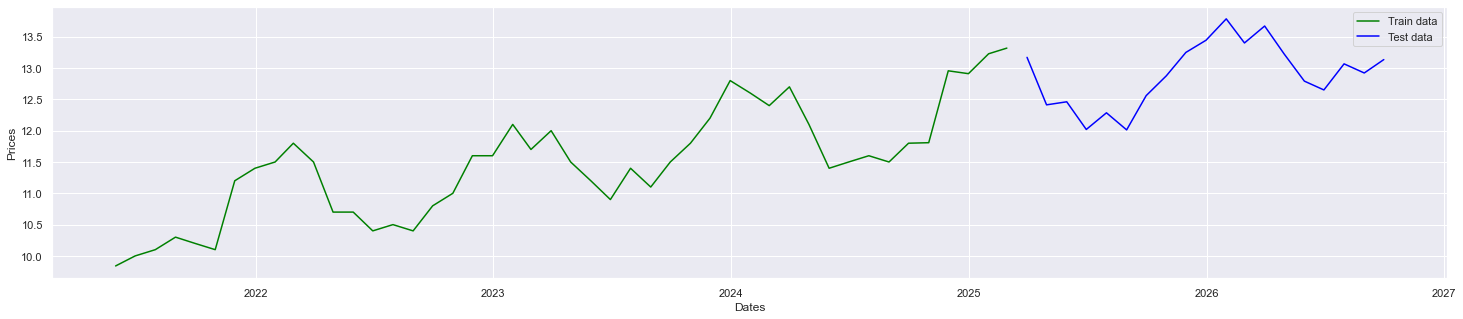

In [9]:
train_len = round(len(gaussian_data)*0.7)
test_len = round(len(df)*0.3)

data_test = gaussian_data.iloc[train_len:]
data_train = gaussian_data.iloc[:train_len]

# test_start = data_train.shape[0] + 1
# test_end = gaussian_data.shape[0]

print(f"Total: {gaussian_data.shape}")
print(f"Train: {data_train.shape}")
print(f"Test: {data_test.shape}")
# print(f"Test start: {test_start}")
# print(f"Test end: {test_end}")

plt.figure(figsize=(25,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data_train.price, 'green', label='Train data')
plt.plot(data_test.price, 'blue', label='Test data')
plt.legend()

In [10]:
X_train = data_train.drop('price', axis =1)
X_test = data_test.drop('price', axis =1)
y_train=data_train['price']
y_test = data_train['price']

In [11]:
kernel = C(1.0, (1e-1, 1e3)) * RBF(10.0, (1e-3, 1e3))

model = gp(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [12]:
model.fit(X_train, y_train)
params = model.kernel_.get_params()

In [13]:
y_pred, sigma = model.predict(X_test, return_std=True)

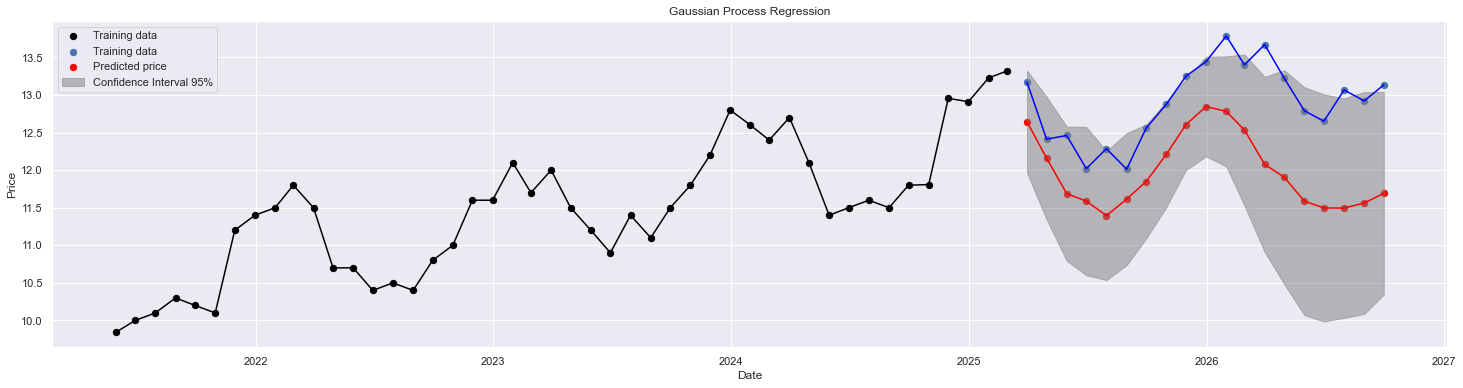

In [14]:
# Plot the results
plt.figure(figsize=(25, 6))
plt.scatter(data_train.index,data_train['price'] , c='black', s=40, label='Training data', marker='o')
plt.plot(data_train.index,data_train['price'], color='black')

plt.scatter(data_test.index,data_test['price'] , c='b', s=40, label='Training data', marker='o')
plt.plot(data_test.index,data_test['price'], color='blue')

plt.scatter(data_test.index, y_pred, color='red', s=40, label='Predicted price', marker='o')
plt.plot(data_test.index, y_pred, color='red')

plt.fill_between(data_test.index, y_pred - 2 * sigma, y_pred + 2 * sigma, color='grey', alpha=0.5, label = 'Confidence Interval 95%')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [21]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold

# Define the kernel space
param_grid = {
    'kernel__k1__constant_value': [1.0, 500.0, 10.0],
    'kernel__k2__length_scale': [0.1, 1.0, 1.0]
}

# Create the Gaussian Process Regressor with kernel
kernel = ConstantKernel() * RBF()
gp = GaussianProcessRegressor(kernel=kernel)

# Grid search with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of folds
grid_search = GridSearchCV(gp, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = GaussianProcessRegressor(
    kernel=ConstantKernel(constant_value=best_params['kernel__k1__constant_value']) *
            RBF(length_scale=best_params['kernel__k2__length_scale'])
)
final_model.fit(X_train, y_train)
params = final_model.kernel_.get_params()
y_pred_new, sigma = model.predict(X_test, return_std=True)


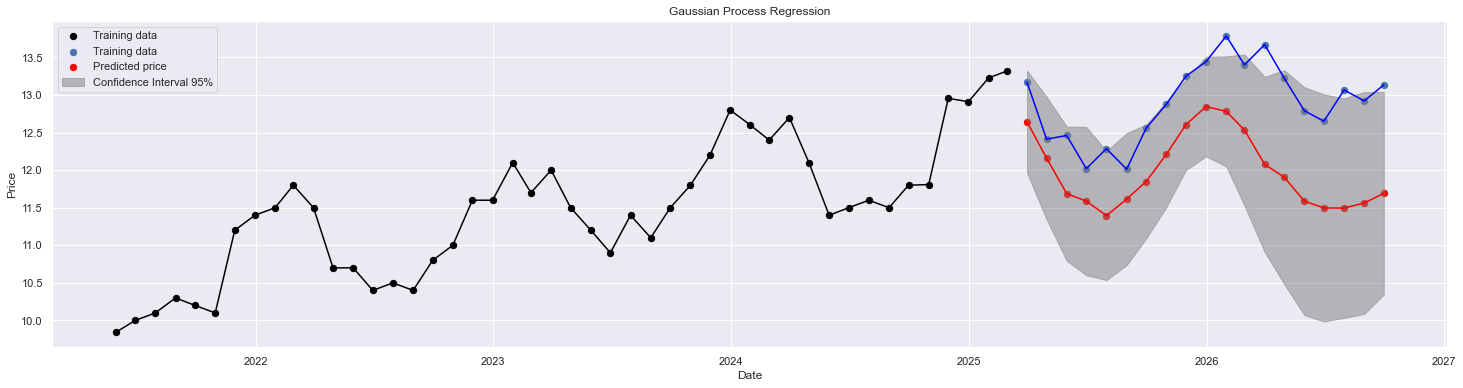

In [22]:
# Plot the results
plt.figure(figsize=(25, 6))
plt.scatter(data_train.index,data_train['price'] , c='black', s=40, label='Training data', marker='o')
plt.plot(data_train.index,data_train['price'], color='black')

plt.scatter(data_test.index,data_test['price'] , c='b', s=40, label='Training data', marker='o')
plt.plot(data_test.index,data_test['price'], color='blue')

plt.scatter(data_test.index, y_pred_new, color='red', s=40, label='Predicted price', marker='o')
plt.plot(data_test.index, y_pred_new, color='red')

plt.fill_between(data_test.index, y_pred_new - 2 * sigma, y_pred_new + 2 * sigma, color='grey', alpha=0.5, label = 'Confidence Interval 95%')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()